In [1]:
import matplotlib.pyplot as plt, numpy as np, numpy.random as npr, csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import LocallyLinearEmbedding
from tqdm import trange
%matplotlib notebook
import torch.nn as nn, timeit, torch, pystan as ps
from time import time
import matplotlib.pyplot as plt
from pylab import plot, show, legend
from samplers import *

In [2]:
sm_refpoints = ps.StanModel(file="nn_refpoints_GPprior.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0d4190ed1eab295696be1c3791f5f94f NOW.


<IPython.core.display.Javascript object>


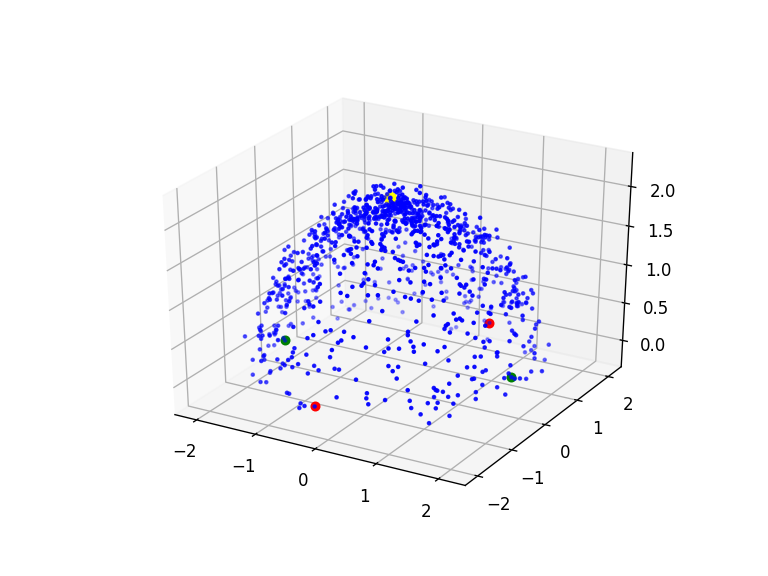

In [11]:
Y = np.genfromtxt('GeodesicDistance/sphere.txt', delimiter=',')
pw_dist_geod = np.genfromtxt('GeodesicDistance/pw_dist.txt', delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=Y[:,0], ys=Y[:,1], zs=Y[:,2], zdir='z', s=3, c=None, depthshade=True, color="blue")
ax.scatter(xs=Y[27,0], ys=Y[27,1], zs=Y[27,2], zdir='z', s=25, c=None, depthshade=True, color="red")
ax.scatter(xs=Y[909,0], ys=Y[909,1], zs=Y[909,2], zdir='z', s=25, c=None, depthshade=True, color="red")
ax.scatter(xs=Y[434,0], ys=Y[434,1], zs=Y[434,2], zdir='z', s=25, c=None, depthshade=True, color="green")
ax.scatter(xs=Y[132,0], ys=Y[132,1], zs=Y[132,2], zdir='z', s=25, c=None, depthshade=True, color="green")
ax.scatter(xs=Y[114,0], ys=Y[114,1], zs=Y[114,2], zdir='z', s=50, c=None, depthshade=True, color="yellow")
plt.show()

### Local linear embedding for reference points:

In [4]:
embedding = LocallyLinearEmbedding(n_components=2)
Y_embedded = embedding.fit_transform(Y)

In [13]:
np.all(np.linalg.eigvals(np.exp(-pw_dist_geod**2)) > 0)

False

In [17]:
Nobs = np.shape(Y)[0]
pw_dist_euclid = np.zeros((Nobs,Nobs))
for i in trange(Nobs) :
    for j in range(Nobs) :
        pw_dist_euclid[i,j] = np.linalg.norm(Y[i]-Y[j])

100%|██████████| 986/986 [00:05<00:00, 166.13it/s]


In [52]:
np.all(np.linalg.eigvals(np.exp(-pw_dist_euclid**2)+1e-5*np.identity(Nobs)) > 0)

True

In [50]:
np.all(np.linalg.eigvals(np.exp(-pw_dist**2)+1e-5*np.identity(Nobs)) > 0)

True